In [1]:
import os
import serpapi
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import time

In [ ]:
load_dotenv()
api_key = os.getenv("serpAPIKey")

In [ ]:
# stocks of the S&P 100
sp_100 = [
    'AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMD', 'AMGN', 'AMT', 'AMZN',
    'AVGO', 'AXP', 'BA', 'BAC', 'BK', 'BKNG', 'BLK', 'BMY', 'BRK-B', 'C',
    'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS',
    'CVX', 'DE', 'DHR', 'DIS', 'DUK', 'EMR', 'F', 'FDX', 'GD',
    'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC',
    'INTU', 'JNJ', 'JPM', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MA',
    'MCD', 'MDLZ', 'MDT', 'MET', 'META', 'MMM', 'MO', 'MRK', 'MS', 'MSFT',
    'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM',
    'QCOM', 'RTX', 'SBUX', 'SCHW', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TMUS',
    'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WFC', 'WMT',
    'XOM', 'DOW', 'PYPL', 'KHC'
]

In [ ]:
start_date = "2004-01-01"
end_date = "2023-12-01"

In [ ]:
sp_100 = np.array_split(sp_100, 21) # Max keys per search is 5
sp_100 = [", ".join(x.tolist()) for x in sp_100]

In [ ]:
client = serpapi.Client(api_key=api_key)

In [ ]:
result_popularity_df = []

In [ ]:
# Getting the S&P100 Google Trends data
for sub_tickers in sp_100:
    
    search = client.search(
        engine="google_trends",
        q=sub_tickers,
        api_key=api_key,
        date=f"{start_date} {end_date}",
        csv=True
    )

    rows = []
    for data in search["interest_over_time"]["timeline_data"]:
        date = data["date"]
        values = data["values"]

        row_data = {"date": date}
        for item in values:
            row_data[item["query"]] = item["extracted_value"]
        rows.append(row_data)
    
    current_df = pd.DataFrame(rows)
    result_popularity_df.append(current_df)
    
    print(f"{sub_tickers} Done!")
    time.sleep(10)

In [ ]:
current_df.date

In [ ]:
result_popularity_df = pd.concat(result_popularity_df, axis=1).drop("date", axis=1)

In [ ]:
result_popularity_df["date"] = current_df["date"]

In [ ]:
result_popularity_df = result_popularity_df.set_index("date")

In [ ]:
result_popularity_df /= 100

In [ ]:
result_popularity_df.plot(legend=False, figsize=(13,5), title="Google Trend Data", ylabel="Popularity")

In [ ]:
result_popularity_df.to_csv("sp100_popularity_raw.csv")

Load the DataFrame

In [5]:
result_popularity_df = pd.read_csv("sp100_popularity_raw.csv", index_col=0)
result_popularity_df.index = pd.to_datetime(result_popularity_df.index)

/var/folders/02/rmgfx9wj0s99nn4tzfthtrnc0000gn/T/ipykernel_23858/2398613393.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result_popularity_df.index = pd.to_datetime(result_popularity_df.index)


<Axes: title={'center': 'Google Trend Data'}, xlabel='date', ylabel='Popularity'>

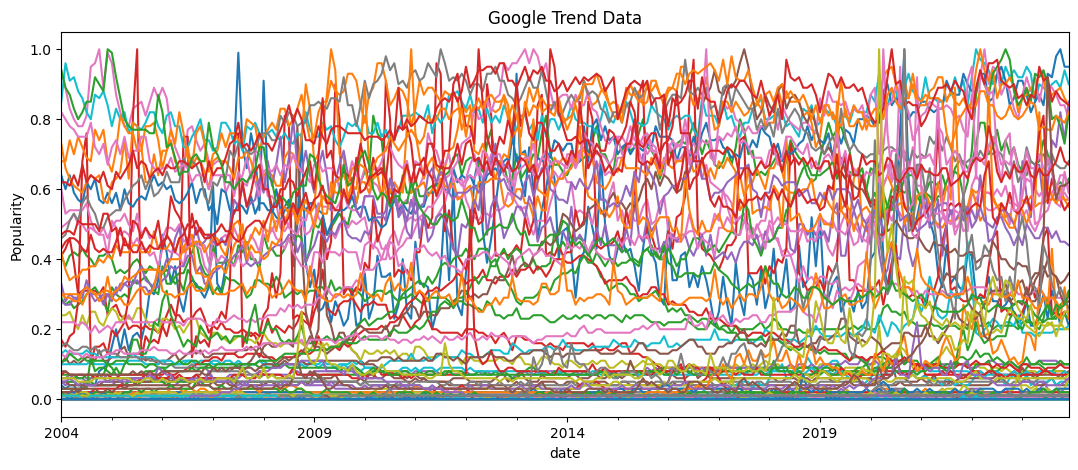

In [6]:
result_popularity_df.plot(legend=False, figsize=(13,5), title="Google Trend Data", ylabel="Popularity")

In [7]:
result_popularity_df_formatted = result_popularity_df.stack().reset_index()
result_popularity_df_formatted.columns = ['date', 'tic', 'popularity']
result_popularity_df_formatted.date = pd.to_datetime(result_popularity_df_formatted.date)
result_popularity_df_formatted = result_popularity_df_formatted.sort_values(["date", 'tic'])
result_popularity_df_formatted = result_popularity_df_formatted.set_index("date")

In [8]:
result_popularity_df_formatted

,tic,popularity
date,,
2004-01-01,AAPL,0.04
2004-01-01,ABBV,0.00
2004-01-01,ABT,0.41
2004-01-01,ACN,0.41
2004-01-01,ADBE,0.05
...,...,...
2023-12-01,V,0.67
2023-12-01,VZ,0.01
2023-12-01,WFC,0.00


In [9]:
result_popularity_df_formatted.to_csv("sp100_popularity_processed.csv")